<a href="https://colab.research.google.com/github/ASJ-data-science/data_science_programming_tests/blob/main/sql_alunos_ASJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de SQL

1. Desenhe um diagrama ER para um banco de dados de um sistema de realização de provas, contendo as seguintes informações:
O aluno pode realizar uma ou mais provas
Cada prova contém uma ou mais questões
O aluno possui nome, data de nascimento, município e estado de nascimento
A prova tem título e data de aplicação
A nota de aprovação para cada prova é 7,0

2. Neste banco de dados, construa uma query que retorne distintamente todos os alunos que realizaram provas com título "Matemática"

3. Nesse banco de dados, construa uma query SQL que retorne a média de notas de cada prova.

4. Nesse banco de dados, construa uma query SQL que retorne a quantidade de alunos aprovados e a quantidade de alunos reprovados para cada prova.

# Imports

In [ ]:
import sqlite3
from sqlite3 import Error

import tqdm
import pandas as pd
import matplotlib.pyplot as plt


# 1. Desenhe um diagrama ER para um banco de dados de um sistema de realização de provas, 

### Database creation and inspection

In [ ]:
database_provas = '/content/provas.db'

conn = sqlite3.connect(database_provas)
print("Opened database successfully");

create_table_alunos = '''CREATE TABLE "alunos" (
                        "id_aluno"	FLOAT,
                        "nome_aluno"	FLOAT,
                        "data_nascimento"	INTEGER,
                        "municipio"	INTEGER,
                        "estado"	INTEGER,
                        PRIMARY KEY("id_aluno")
                    );'''


create_table_provas = '''CREATE TABLE "provas" (
                        "id_prova"	INTEGER,
                        "id_materia"	INTEGER,
                        "materia"	TEXT,
                        "data_aplicacao"	INTEGER,
                        PRIMARY KEY("id_prova")
                    );'''


create_table_notas = '''CREATE TABLE "notas" (
                        "id_prova"	INTEGER,
                        "id_aluno"	INTEGER,
                        "nota"	NUMERIC,
                        "questao"	INTEGER,
                        "id"	INTEGER,
                        PRIMARY KEY("id" AUTOINCREMENT)
                    )'''


try:
  conn.execute(create_table_alunos)
  print("table_alunos created successfully")
  conn.execute(create_table_provas)
  print("table_provas created successfully")
  conn.execute(create_table_notas)
  print("table_notas created successfully")

except Error as e:
        print(e)

conn.commit()
print("Table created successfully");
conn.close()

Opened database successfully
table_alunos created successfully
table_provas created successfully
table_notas created successfully
Table created successfully


In [ ]:
def print_db_schema(database):
    newline_indent = '\n   '

    db=sqlite3.connect(database)
    db.text_factory = str
    cur = db.cursor()

    result = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    table_names = sorted(list(zip(*result))[0])
    print ("\ntables are:"+newline_indent+newline_indent.join(table_names))

    for table_name in table_names:
        result = cur.execute("PRAGMA table_info('%s')" % table_name).fetchall()
        column_names = list(zip(*result))[1]
        print (("\ncolumn names for %s:" % table_name)
            +newline_indent
            +(newline_indent.join(column_names)))

    db.close()
    print ("\nexiting.")

In [ ]:
print_db_schema(database_provas)


tables are:
   alunos
   notas
   provas
   sqlite_sequence

column names for alunos:
   id_aluno
   nome_aluno
   data_nascimento
   municipio
   estado

column names for notas:
   id_prova
   id_aluno
   nota
   questao
   id

column names for provas:
   id_prova
   id_materia
   materia
   data_aplicacao

column names for sqlite_sequence:
   name
   seq

exiting.


## Populate database

In [ ]:
questoes = 10

dicto_provas = [{'id_prova': 1, 'id_materia': 1, 'nome_materia': 'mathematika', 'data': '22/06/2022'}, 
                {'id_prova': 2, 'id_materia': 2, 'nome_materia': 'fysikos', 'data': '23/06/2022'}, 
                {'id_prova': 3, 'id_materia': 3, 'nome_materia': 'quimica', 'data': '05/06/2022'}, 
                {'id_prova': 4, 'id_materia': 1, 'nome_materia': 'mathematika', 'data': '06/04/2022'}, 
                {'id_prova': 5, 'id_materia': 4, 'nome_materia': 'latim', 'data': '01/04/2022'},
                {'id_prova': 6, 'id_materia': 1, 'nome_materia': 'mathematika', 'data': '21/04/2022'}]

dicto_aluno = [{'id_aluno':  1, 'nome':'Hypatia', 'data_nascimento': '01/01/1980', 'municipio': 'Athenas', 'estado': 'GR'}, 
               {'id_aluno':  2, 'nome':'Ricieri', 'data_nascimento': '23/04/1980', 'municipio': 'Cornelio Procopio', 'estado': 'PR'}, 
               {'id_aluno':  3, 'nome':'Ada Byron', 'data_nascimento': '03/01/1980', 'municipio': 'Londres', 'estado': 'UK'}, 
               {'id_aluno':  4, 'nome':'Fatio', 'data_nascimento': '07/04/1980', 'municipio': 'Basileia', 'estado': 'CH'}, 
               {'id_aluno':  5, 'nome':'Newton', 'data_nascimento': '21/11/1980', 'municipio': ' Woolsthorpe Manor', 'estado': 'UK'}, 
               {'id_aluno':  6, 'nome':'Leibniz', 'data_nascimento': '01/06/1980', 'municipio': 'Lipsia', 'estado': 'AL'}, 
               {'id_aluno':  7, 'nome':'M Leblanc', 'data_nascimento': '15/03/1980', 'municipio': 'Paris', 'estado': 'FR'}]

In [ ]:
from random import choice, random

linhas = []
for al in dicto_aluno:
    for pr in dicto_provas:
        for qs in range(1, questoes + 1):
            if al['id_aluno'] == 5 or al['id_aluno'] == 6:
                n = 1
            elif al['id_aluno'] == 2:
                n = 1 if random() > 0.6 else 0
            else:
                n = 1 if random() > 0.25 else 0
                 
            linhas.append([al['id_aluno'], pr['id_prova'], qs, n])

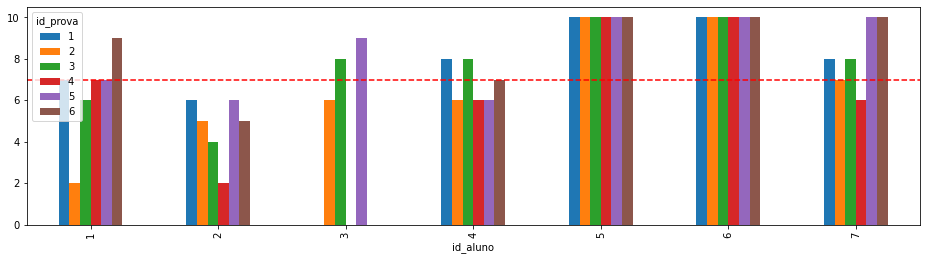

In [ ]:
df_provas = pd.DataFrame(linhas, columns=['id_aluno', 'id_prova', 'questao', 'nota'])

# Ada Byron miss an mathematika test
df_provas = df_provas.loc[(df_provas["id_aluno"] != 3) | (~df_provas["id_prova"].isin([1, 4, 6]))]

result = df_provas.groupby(['id_aluno','id_prova'])['nota'].sum().reset_index().set_index('id_aluno')
table = result.pivot(columns='id_prova',values='nota')
table.plot(kind='bar', figsize=(16, 4))
plt.axhline(y = 7, color = 'r', linestyle = '--');

In [ ]:
# Insert alunos into db

conn = sqlite3.connect(database_provas)
cur = conn.cursor()

sql = """INSERT INTO alunos(id_aluno, nome_aluno, data_nascimento, municipio, estado)
              VALUES(?,?,?,?,?)"""

for dicto in dicto_aluno:
    task = (dicto['id_aluno'], dicto['nome'], dicto['data_nascimento'], dicto['municipio'], dicto['estado'])
    print(type(task))
    print(task)
    try:
        cur.execute(sql, task)
    except Error as e:
        print(e)

conn.commit()
conn.close()

<class 'tuple'>
(1, 'Hypatia', '01/01/1980', 'Athenas', 'GR')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(2, 'Ricieri', '23/04/1980', 'Cornelio Procopio', 'PR')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(3, 'Ada Byron', '03/01/1980', 'Londres', 'UK')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(4, 'Fatio', '07/04/1980', 'Basileia', 'CH')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(5, 'Newton', '21/11/1980', ' Woolsthorpe Manor', 'UK')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(6, 'Leibniz', '01/06/1980', 'Lipsia', 'AL')
UNIQUE constraint failed: alunos.id_aluno
<class 'tuple'>
(7, 'M Leblanc', '15/03/1980', 'Paris', 'FR')
UNIQUE constraint failed: alunos.id_aluno


In [ ]:
# verify if alunos in db
conn = sqlite3.connect(database_provas)
cursor = conn.execute(''' select * FROM alunos;''')

for row in cursor:
    print(row)
conn.close()

(1.0, 'Hypatia', '01/01/1980', 'Athenas', 'GR')
(2.0, 'Ricieri', '23/04/1980', 'Cornelio Procopio', 'PR')
(3.0, 'Ada Byron', '03/01/1980', 'Londres', 'UK')
(4.0, 'Fatio', '07/04/1980', 'Basileia', 'CH')
(5.0, 'Newton', '21/11/1980', ' Woolsthorpe Manor', 'UK')
(6.0, 'Leibniz', '01/06/1980', 'Lipsia', 'AL')
(7.0, 'M Leblanc', '15/03/1980', 'Paris', 'FR')


In [ ]:
# insert provas into db
conn = sqlite3.connect(database_provas)
cur = conn.cursor()

sql = """INSERT INTO provas(id_prova, id_materia, materia, data_aplicacao)
              VALUES(?,?,?,?)"""

for dicto in dicto_provas:
    task = (dicto['id_prova'], dicto['id_materia'], dicto['nome_materia'], dicto['data'])
    try:
        cur.execute(sql, task)
    except Error as e:
        print(e)

conn.commit()
conn.close()

In [ ]:
# verify if provas in db
conn = sqlite3.connect(database_provas)
cursor = conn.execute(''' select * FROM provas;''')

for row in cursor:
    print(row)
conn.close()

(1, 1, 'mathematika', '22/06/2022')
(2, 2, 'fysikos', '23/06/2022')
(3, 3, 'quimica', '05/06/2022')
(4, 1, 'mathematika', '06/04/2022')
(5, 4, 'latim', '01/04/2022')
(6, 1, 'mathematika', '21/04/2022')


In [ ]:
# insert notas into db
conn = sqlite3.connect(database_provas)
cur = conn.cursor()

sql = """INSERT INTO notas(id_prova, id_aluno, questao, nota)
              VALUES(?,?,?,?)"""

for _, row in tqdm.tqdm(df_provas.iterrows(), total=df_provas.shape[0]):
  
    task = (int(row.id_prova), int(row.id_aluno), int(row.questao), int(row.nota))
    try:
        cur.execute(sql, task)
    except Error as e:
        print(e)

conn.commit()
conn.close()

100%|██████████| 390/390 [00:00<00:00, 10072.65it/s]


In [ ]:
# verify if notas in db
conn = sqlite3.connect(database_provas)
cursor = conn.execute(''' select * FROM notas;''')

for row in cursor:
    print(row)
conn.close()

(1, 1, 0, 1, 1)
(1, 1, 0, 2, 2)
(1, 1, 1, 3, 3)
(1, 1, 1, 4, 4)
(1, 1, 1, 5, 5)
(1, 1, 0, 6, 6)
(1, 1, 1, 7, 7)
(1, 1, 1, 8, 8)
(1, 1, 1, 9, 9)
(1, 1, 1, 10, 10)
(2, 1, 0, 1, 11)
(2, 1, 1, 2, 12)
(2, 1, 0, 3, 13)
(2, 1, 0, 4, 14)
(2, 1, 0, 5, 15)
(2, 1, 0, 6, 16)
(2, 1, 0, 7, 17)
(2, 1, 0, 8, 18)
(2, 1, 0, 9, 19)
(2, 1, 1, 10, 20)
(3, 1, 1, 1, 21)
(3, 1, 0, 2, 22)
(3, 1, 1, 3, 23)
(3, 1, 1, 4, 24)
(3, 1, 0, 5, 25)
(3, 1, 0, 6, 26)
(3, 1, 1, 7, 27)
(3, 1, 0, 8, 28)
(3, 1, 1, 9, 29)
(3, 1, 1, 10, 30)
(4, 1, 1, 1, 31)
(4, 1, 1, 2, 32)
(4, 1, 1, 3, 33)
(4, 1, 1, 4, 34)
(4, 1, 1, 5, 35)
(4, 1, 0, 6, 36)
(4, 1, 0, 7, 37)
(4, 1, 1, 8, 38)
(4, 1, 1, 9, 39)
(4, 1, 0, 10, 40)
(5, 1, 1, 1, 41)
(5, 1, 1, 2, 42)
(5, 1, 1, 3, 43)
(5, 1, 1, 4, 44)
(5, 1, 1, 5, 45)
(5, 1, 0, 6, 46)
(5, 1, 1, 7, 47)
(5, 1, 1, 8, 48)
(5, 1, 0, 9, 49)
(5, 1, 0, 10, 50)
(6, 1, 0, 1, 51)
(6, 1, 1, 2, 52)
(6, 1, 1, 3, 53)
(6, 1, 1, 4, 54)
(6, 1, 1, 5, 55)
(6, 1, 1, 6, 56)
(6, 1, 1, 7, 57)
(6, 1, 1, 8, 58)
(6, 1, 1, 9, 59)
(

# 2. Neste banco de dados, construa uma query que retorne distintamente todos os alunos que realizaram provas com título "Matemática"

In [ ]:
conn = sqlite3.connect(database_provas)

cursor = conn.execute('''
SELECT DISTINCT
    alunos.nome_aluno 
FROM
    alunos
INNER JOIN notas ON
    notas.id_aluno = alunos.id_aluno
LEFT JOIN provas ON 
	notas.id_prova = provas.id_prova
WHERE provas.materia == 'mathematika'
;''')

for row in cursor:
    print(row[0])
conn.close()

Hypatia
Ricieri
Fatio
Newton
Leibniz
M Leblanc


# 3. Nesse banco de dados, construa uma query SQL que retorne a média de notas de cada prova.

In [ ]:
conn = sqlite3.connect(database_provas)

cursor = conn.execute('''
SELECT
	provas.materia,
	notas.id_prova,
	provas.data_aplicacao,
	round(avg(notas.nota)*10,2) as Média

FROM
    notas
inner JOIN provas ON
	notas.id_prova = provas.id_prova
	
GROUP BY provas.id_prova
;''')

df = pd.DataFrame(columns=['Data', 'Prova_id', 'Materia', 'Media'])
for row in cursor:
    df = df.append({'Data': row[2], 'Prova_id': row[1], 'Materia': row[0], 'Media': row[3]}, ignore_index=True)
    #print(row[2], row[1], row[0], row[3])
conn.close()
df

,Data,Prova_id,Materia,Media
0,22/06/2022,1,mathematika,8.17
1,23/06/2022,2,fysikos,6.57
2,05/06/2022,3,quimica,7.71
3,06/04/2022,4,mathematika,6.83
4,01/04/2022,5,latim,8.29
5,21/04/2022,6,mathematika,8.50


# 4. Nesse banco de dados, construa uma query SQL que retorne a quantidade de alunos aprovados e a quantidade de alunos reprovados para cada prova.

In [ ]:
conn = sqlite3.connect(database_provas)

cursor = conn.execute('''
SELECT materia,
		sum(CASE WHEN (sum_nota_prova / max_provas) >= 7 THEN 1 ELSE 0 END) as "Aprovados",
		sum(CASE WHEN (sum_nota_prova / max_provas) < 7 THEN 1 ELSE 0 END) as "Reprovados"
	FROM(SELECT	*, max(num_provas) as max_provas
		FROM	
			(SELECT
				alunos.nome_aluno as nome_aluno,
				provas.materia as materia,
				sum(notas.nota) as sum_nota_prova,
				count(distinct notas.id_prova) as num_provas,
				notas.id
				
				
			FROM notas
			JOIN provas ON
				notas.id_prova = provas.id_prova
			JOIN alunos ON
			   notas.id_aluno = alunos.id_aluno
			group by nome_aluno, materia)
	Group by id, materia)
group by materia
;''')

df = pd.DataFrame(columns=['Materia', 'Aprovados', 'Reprovados'])
for row in cursor:
    df = df.append({'Materia': row[0], 'Aprovados': row[1], 'Reprovados': row[2]}, ignore_index=True)
    #print(row[0], row[1], row[2])
conn.close()
df

,Materia,Aprovados,Reprovados
0,fysikos,3,4
1,latim,5,2
2,mathematika,5,1
3,quimica,5,2


## Retornar os alunos com maiores notas em cada prova

In [ ]:
conn = sqlite3.connect(database_provas)

# ESCOLHA UMA NOTA PARA VER APENAS OS VALORES ACIMA
FILTRO = 9

cursor = conn.execute(f'''SELECT
	provas.materia,
	alunos.nome_aluno,

	round(avg(notas.nota)*10,2) as Media

FROM
    notas
JOIN provas ON
	notas.id_prova = provas.id_prova
JOIN alunos ON
	notas.id_aluno = alunos.id_aluno
	
group by alunos.nome_aluno, provas.materia

HAVING Media > {FILTRO}

ORDER BY Media DESC, provas.materia

;''')

df = pd.DataFrame(columns=['Materia', 'Nome_aluno', 'Media'])
for row in cursor:
    df = df.append({'Materia': row[0], 'Nome_aluno': row[1], 'Media': row[2]}, ignore_index=True)
    #print(row[0], row[1], row[2])
conn.close()
df

,Materia,Nome_aluno,Media
0,fysikos,Leibniz,10.0
1,fysikos,Newton,10.0
2,latim,Leibniz,10.0
3,latim,M Leblanc,10.0
4,latim,Newton,10.0
5,mathematika,Leibniz,10.0
6,mathematika,Newton,10.0
7,quimica,Leibniz,10.0
8,quimica,Newton,10.0
